<a href="https://colab.research.google.com/github/WhiteHum/Application-security/blob/main/3_06_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

## Overview

In this lab, we will train a Decision Tree using the same SMART status data that we have used in the previous labs.  We will measure the accuracy of that decision tree and use it as the basis of evaluation for the lab that follows.

## Goals

Learn how to use a Decision Tree classifier

 
## Estimated Time: 30 minutes

As was true with the last lab, we will once again be evaluating the data from BackBlaze.

# <img src="../images/task.png" width=20 height=20> Task 6.1

Please copy the relevant code from the previous two labs that:

* Loads the data from the first 20 files
* Splits the labels out into a separate array
* Converts the data and the labels to Numpy arrays
* Eliminates NaN and other potential issues
* Splits the data and labels into two arrays, (x, y) and (x_test, y_test) where the test data is 25% of the original dataset

In [ ]:
import os
import pandas as pd
import numpy as np

def get_file_list(starting_directory="../data/data_Q4_2020/"):
    final_list = list()
    files = os.listdir(starting_directory)
    for file in files:
        file_name = os.path.join(starting_directory, file)
        if os.path.isdir(file_name):
            final_list = final_list + get_file_list(file_name)
        else:
            final_list.append(file_name)
    return final_list

all_files = get_file_list()
columns = [
    'failure', 
    'capacity_bytes',
    'smart_1_normalized',
    'smart_2_normalized',
    'smart_3_normalized',
    'smart_4_normalized',
    'smart_5_normalized',
    'smart_7_normalized',
    'smart_8_normalized',
    'smart_9_normalized',
    'smart_10_normalized',
    'smart_11_normalized',
    'smart_12_normalized',
    'smart_13_normalized',
    'smart_15_normalized',
    'smart_16_normalized',
    'smart_17_normalized',
    'smart_18_normalized',
    'smart_22_normalized',
    'smart_23_normalized',
    'smart_24_normalized',
    'smart_168_normalized',
    'smart_170_normalized',
    'smart_173_normalized',
    'smart_174_normalized',
    'smart_175_normalized',
    'smart_177_normalized',
    'smart_179_normalized',
    'smart_180_normalized',
    'smart_181_normalized',
    'smart_182_normalized',
    'smart_183_normalized',
    'smart_184_normalized',
    'smart_187_normalized',
    'smart_188_normalized',
    'smart_189_normalized',
    'smart_190_normalized',
    'smart_191_normalized',
    'smart_192_normalized',
    'smart_193_normalized',
    'smart_194_normalized',
    'smart_195_normalized',
    'smart_196_normalized',
    'smart_197_normalized',
    'smart_198_normalized',
    'smart_199_normalized',
    'smart_200_normalized',
    'smart_201_normalized',
    'smart_202_normalized',
    'smart_206_normalized',
    'smart_210_normalized',
    'smart_218_normalized',
    'smart_220_normalized',
    'smart_222_normalized',
    'smart_223_normalized',
    'smart_224_normalized',
    'smart_225_normalized',
    'smart_226_normalized',
    'smart_231_normalized',
    'smart_232_normalized',
    'smart_233_normalized',
    'smart_234_normalized',
    'smart_235_normalized',
    'smart_240_normalized',
    'smart_241_normalized',
    'smart_242_normalized',
    'smart_245_normalized',
    'smart_247_normalized',
    'smart_248_normalized',
    'smart_250_normalized',
    'smart_251_normalized',
    'smart_252_normalized',
    'smart_254_normalized',
    'smart_255_normalized'
]
started = False
for f in all_files[:5]:
    if started:
        new_df = pd.read_csv(f, usecols=columns)
        df = df.append(new_df, ignore_index=True)
    else:
        df = pd.read_csv(f, usecols=columns)
        started = True

# Grab the labels
labels = df['failure'].to_numpy()
# Drop the failure column
df.drop('failure', axis=1, inplace=True)

# Convert to an array and replace NaN values
x = df.to_numpy()
for i in np.argwhere(np.isnan(x)):
    x[i[0],i[1]] = 0

testing_split = int(len(labels)*0.25)

x_train = x[:testing_split]
y_train = labels[:testing_split]
x_test = x[testing_split:]
y_test = labels[testing_split:]




Decision Trees are also available to us in the Scikit Learn package in the `tree` module.  After importing this module, we can access Decision Trees using the `DecisionTreeClassifier` class.  Using this class is exceptionally simple.  As with most classifiers, we need simply pass it the data and the labels, after which it will build the classifier.

# <img src="../images/task.png" width=20 height=20> Task 6.2

The `sklearn` package includes a `tree` module that can be used to build decision trees easily.  Import the `tree` module.  Use it to instantiate a `DecisionTreeClassifer()` object and fit the model.

Use the `tree.plot_tree()` function to plot the resulting classifier.

[Text(163.59545454545454, 201.90857142857143, 'X[8] <= 40.5\ngini = 0.0\nsamples = 192150\nvalue = [192145, 5]'),
 Text(76.0909090909091, 170.84571428571428, 'X[52] <= 39.5\ngini = 0.004\nsamples = 999\nvalue = [997, 2]'),
 Text(30.436363636363637, 139.78285714285715, 'X[52] <= 38.5\ngini = 0.002\nsamples = 994\nvalue = [993, 1]'),
 Text(15.218181818181819, 108.72, 'gini = 0.0\nsamples = 965\nvalue = [965, 0]'),
 Text(45.654545454545456, 108.72, 'X[38] <= 99.5\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(30.436363636363637, 77.65714285714284, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(60.872727272727275, 77.65714285714284, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(121.74545454545455, 139.78285714285715, 'X[52] <= 40.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(106.52727272727273, 108.72, 'X[8] <= 39.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(91.30909090909091, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(121.74545

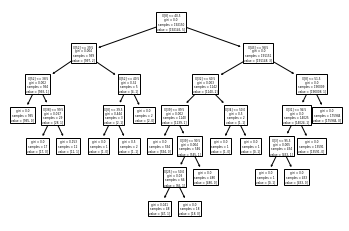

In [ ]:
# Import the Decision Tree "stuff" from sklearn
from sklearn import tree

# Create a tree object
classifier = tree.DecisionTreeClassifier()
# Ask the tree to fit the data to the labels!  That's it!
classifier = classifier.fit(x_train, y_train)

# The DecisionTreeClassifier type provides a convenient visualization element. 
# Let's ask it to show us how our tree works.
tree.plot_tree(classifier)


That was pretty easy!  How do we use the classifier?  We use the same `predict()` pattern that we have seen with others.

# <img src="../images/task.png" width=20 height=20> Task 6.3

Use the tree that you have created to `predict()` the test data.  What is the accuracy of the tree?


In [ ]:
def accuracy(y_hat, y):
    accuracy = 0
    correct = [y_hat[i] == y[i] for i in range(len(y_hat))]
    correct = np.array([1 if i else 0 for i in correct])
    accuracy = correct.sum()/len(y_hat)
    print(f'Overall accuracy: {accuracy * 100.0}%')
    return accuracy

predictions = classifier.predict(x_test)
accuracy(y_test, predictions)

Overall accuracy: 99.99722440029699%


0.9999722440029699

# Conclusion

Decision Trees follow a very simple algorithm.  This makes building them relatively straightforward, though they can end up being quite tall.  The downside of a Decision Tree is that the decision boundary ends up being fairly hard, meaning that we may end up having mis-classifications for new data unless the new data is very similar to the training data.  In the next lab, we will attempt to improve this.